In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

### Data inspection al día 20/11/2023

In [6]:
df_usd = pd.read_csv('cotizacion_usd.csv')
sta_df_usd = df_usd.describe()
sta_df_usd .loc['Nan'] = df_usd.isna().sum()
sta_df_usd .loc['%Nan'] = (df_usd.isna().mean())*100
sta_df_usd 

,v
count,5884.000000
mean,51.365097
std,123.815493
min,0.996500
25%,3.100000
50%,4.473750
75%,18.140000
max,1100.000000
Nan,0.000000
%Nan,0.000000


In [7]:
df_usd_of = pd.read_csv('cotizacion_usd_of.csv')
sta_df_usd_of = df_usd_of.describe()
sta_df_usd_of.loc['Nan'] = df_usd_of.isna().sum()
sta_df_usd_of.loc['%Nan'] = (df_usd_of.isna().mean())*100
sta_df_usd_of 

,v
count,5331.000000
mean,31.846475
std,59.779134
min,1.990000
25%,3.150000
50%,4.850000
75%,24.785000
max,354.010000
Nan,0.000000
%Nan,0.000000


In [8]:
df_var_usd_vs_usd_of_data = pd.read_csv('var_usd_vs_usd_of_data.csv')
sta_df_var_usd_vs_usd_of_data = df_var_usd_vs_usd_of_data.describe()
sta_df_var_usd_vs_usd_of_data.loc['Nan'] = df_var_usd_vs_usd_of_data.isna().sum()
sta_df_var_usd_vs_usd_of_data.loc['%Nan'] = (df_var_usd_vs_usd_of_data.isna().mean())*100
sta_df_var_usd_vs_usd_of_data

,v
count,5324.000000
mean,25.682826
std,36.593053
min,-4.835400
25%,0.793700
50%,3.102750
75%,52.004625
max,214.285700
Nan,0.000000
%Nan,0.000000


### Comentario:
Como se puede observar las fechas, en los distintos df, parten de diferentes años y meses. Por lo tanto, se toma la primer fecha de coincidencia entre todos los df en delante.

In [9]:
start_date = '2002-03-04'

# Filtrar las cotizaciones desde la fecha específica
df_usd = df_usd[df_usd['d'] >= start_date]
df_usd_of = df_usd_of[df_usd_of['d']>= start_date]
df_var_usd_vs_usd_of_data = df_var_usd_vs_usd_of_data[df_var_usd_vs_usd_of_data['d']>= start_date]

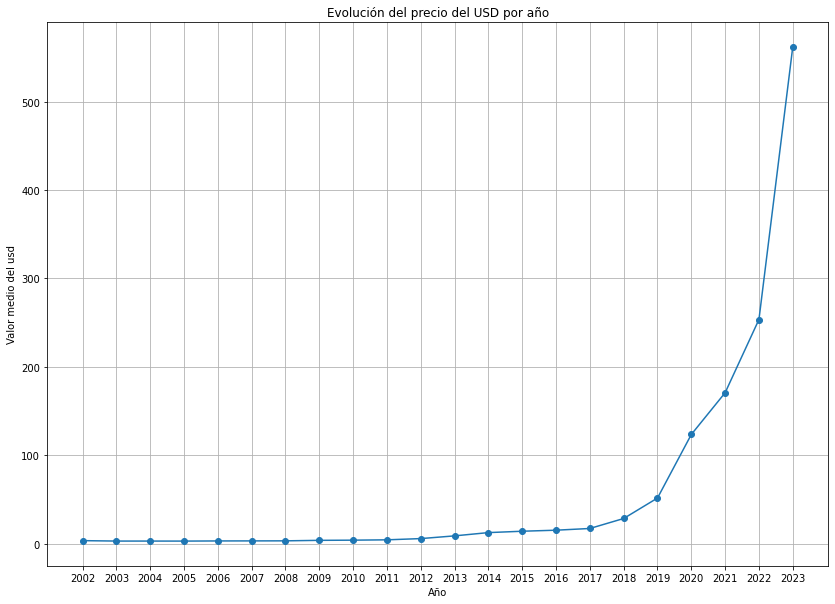

In [21]:
# Convertir la columna de fecha al formato adecuado
df_usd['d'] = pd.to_datetime(df_usd['d'])

# Agregar una columna 'año' para facilitar el agrupamiento
df_usd['año'] = df_usd['d'].dt.year

# Graficar la evolución del usd por año
plt.figure(figsize=(14, 10))
años = list(range(2002, 2024))
df_usd.groupby('año')['v'].mean().plot(marker='o', linestyle='-')
plt.title('Evolución del precio del USD por año')
plt.xlabel('Año')
plt.xticks(años)
plt.ylabel('Valor medio del usd')
plt.grid(True)
plt.show()

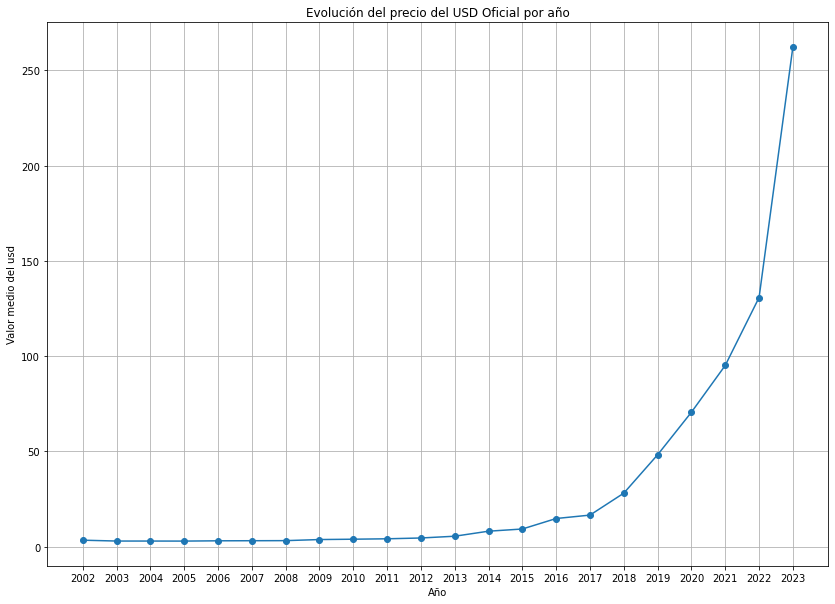

In [20]:

df_usd_of['d'] = pd.to_datetime(df_usd_of['d'])
df_usd_of['año'] = df_usd_of['d'].dt.year

# Graficar la evolución del usd oficial por año
plt.figure(figsize=(14, 10))
años = list(range(2002, 2024))
df_usd_of.groupby('año')['v'].mean().plot(marker='o', linestyle='-')
plt.title('Evolución del precio del USD Oficial por año')
plt.xlabel('Año')
plt.ylabel('Valor medio del usd')
plt.xticks(años)  # Mostrar todos los años desde 2002 hasta 2023
plt.grid(True)
plt.show()

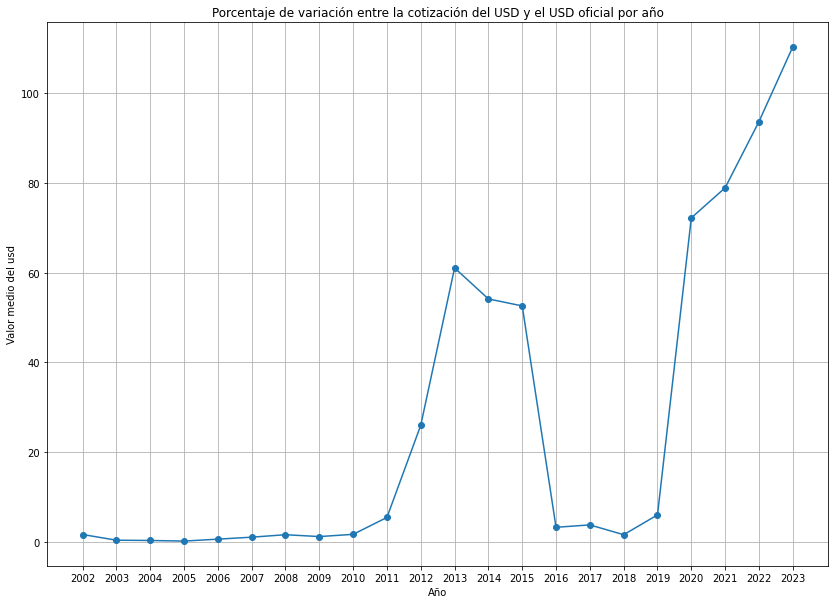

In [15]:
df_var_usd_vs_usd_of_data['d'] = pd.to_datetime(df_var_usd_vs_usd_of_data['d'])
df_var_usd_vs_usd_of_data['año'] = df_var_usd_vs_usd_of_data['d'].dt.year

# Graficar la evolución del usd oficial por año
plt.figure(figsize=(14, 10))
años = list(range(2002, 2024))
df_var_usd_vs_usd_of_data.groupby('año')['v'].mean().plot(marker='o', linestyle='-')
plt.title('Porcentaje de variación entre la cotización del USD y el USD oficial por año')
plt.xlabel('Año')
plt.ylabel('Valor medio del usd')
plt.xticks(años)  # Mostrar todos los años desde 2002 hasta 2023
plt.grid(True)
plt.show()

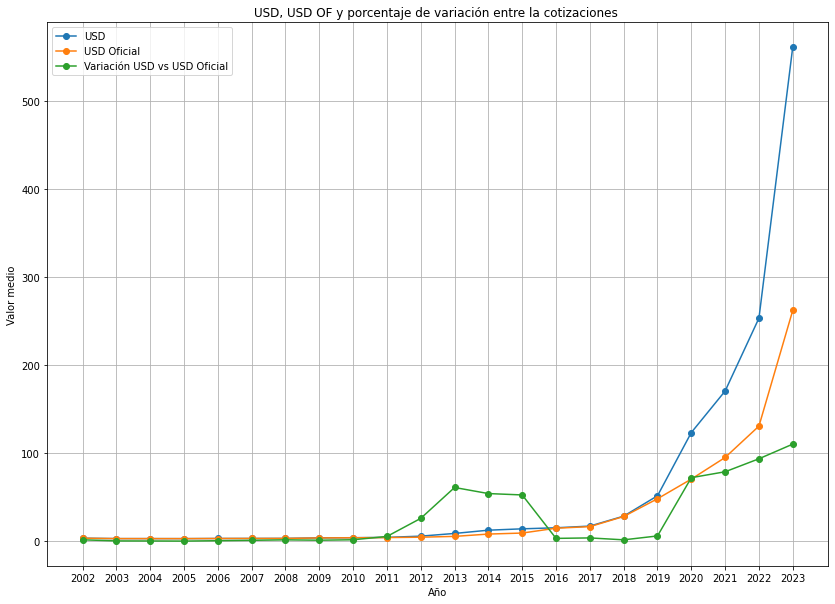

In [16]:
# Graficar la evolución de las variables en un solo gráfico
plt.figure(figsize=(14, 10))

# Obtener la lista de años desde 2002 hasta 2023
años = list(range(2002, 2024))

# Graficar datos para el USD
plt.plot(df_usd.groupby('año')['v'].mean(), label='USD', marker='o', linestyle='-')

# Graficar datos para el USD Oficial
plt.plot(df_usd_of.groupby('año')['v'].mean(), label='USD Oficial', marker='o', linestyle='-')

# Graficar datos para la variación entre USD y USD Oficial
plt.plot(df_var_usd_vs_usd_of_data.groupby('año')['v'].mean(), label='Variación USD vs USD Oficial', marker='o', linestyle='-')

# Añadir etiquetas y leyenda
plt.title('USD, USD OF y porcentaje de variación entre la cotizaciones ')
plt.xlabel('Año')
plt.ylabel('Valor medio')
plt.xticks(años)  # Mostrar todos los años desde 2002 hasta 2023
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()